In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
realtor =  pd.read_csv(r'C:\Users\raian\OneDrive\Coderhouse\python_54375\data\realtor-data.csv')
df = pd.DataFrame({'X':[14,33,42,54,62,71],
                   'Y':[1,3,4,5,6,4]})
df

,X,Y
0,14,1
1,33,3
2,42,4
3,54,5
4,62,6
5,71,4


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
modelo = LinearRegression()
modelo.fit(df[['X']],df[['Y']] )
df['YPred']= modelo.predict(df[['X']])
df

,X,Y,YPred
0,14,1,1.619777
1,33,3,2.934076
2,42,4,3.556639
3,54,5,4.386722
4,62,6,4.940111
5,71,4,5.562674


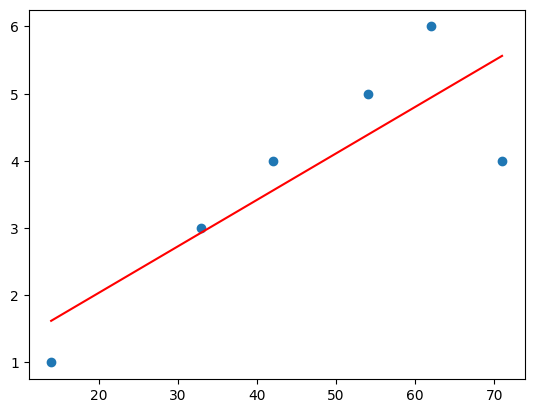

In [5]:
plt.scatter(df['X'], df['Y'])
plt.plot(df['X'], df['YPred'], color = 'red')
plt.show()

In [6]:
 x = pd.DataFrame({'x': [50,80,18]})

In [7]:
modelo.predict(x[['x']].values)

C:\Users\raian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.11002786],
       [6.18523677],
       [1.89647168]])

In [8]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(df['Y'],df['YPred'])
print(r2)
mse = mean_squared_error(df['Y'],df['YPred'])
mse

0.6948452317611343


0.7544103992571958

## Exercicios em Sala
https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download

Utilizando a base "realtor-data.csv" gerar as seguintes features:
 - maior tamanho de casa por cidade. 
 - menor tamanho de casa por cidade. 
 - tamanho de casa médio por cidade. 
 - porcentagem de missing values do tamanho de casa por cidade. 

In [9]:
realtor.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [10]:
realtor['hs_missing'] = np.where(realtor['house_size'].isnull(),1,0 ) 
realtor

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,hs_missing
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0,0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0,0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0,0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0,0


In [11]:
df1 = realtor.groupby(['city','state']).agg(
    {"house_size" :['max', 'min', 'mean'], 'hs_missing': 'mean' })

df1

house_size                      hs_missing
                                 max     min         mean       mean
city        state                                                   
Acton       Massachusetts    99999.0   918.0  4940.695652   0.157509
Adams       Massachusetts     9516.0   640.0  2332.830078   0.316422
Adjuntas    Puerto Rico       1527.0   920.0  1214.303030   0.000000
Agawam      Massachusetts     3200.0   676.0  1675.292230   0.070644
Aguada      Puerto Rico       6000.0   600.0  2139.268116   0.471264
...                              ...     ...          ...        ...
Worcester   Massachusetts    14532.0   456.0  2469.285381   0.087511
Worthington Massachusetts    14240.0  2180.0  6878.363636   0.629213
Wrentham    Massachusetts     3872.0  1044.0  2290.941176   0.227273
Yabucoa     Puerto Rico       4902.0   849.0  1634.038462   0.434783
Yauco       Puerto Rico       1800.0   621.0  1120.250000   0.148148

[582 rows x 4 columns]